In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import warnings
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype

In [24]:
salaryData = pd.read_csv('IT Salary Survey EU  2020.csv', parse_dates=['Timestamp'])

In [25]:
salaryData.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,2020-11-24 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,2020-11-24 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,2020-11-24 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,2020-11-24 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,2020-11-24 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [26]:
salaryData.head().T

,0,1,2,3,4
Timestamp,2020-11-24 11:14:15,2020-11-24 11:14:16,2020-11-24 11:14:21,2020-11-24 11:15:24,2020-11-24 11:15:46
Age,26.0,26.0,29.0,28.0,37.0
Gender,Male,Male,Male,Male,Male
City,Munich,Berlin,Berlin,Berlin,Berlin
Position,Software Engineer,Backend Developer,Software Engineer,Frontend Developer,Backend Developer
Total years of experience,5,7,12,4,17
Years of experience in Germany,3,4,6,1,6
Seniority level,Senior,Senior,Lead,Junior,Senior
Your main technology / programming language,TypeScript,Ruby,Javascript / Typescript,Javascript,C# .NET
Other technologies/programming languages you use often,"Kotlin, Javascript / Typescript",NaN,"Javascript / Typescript, Docker",NaN,".NET, SQL, AWS, Docker"


In [27]:
salaryData.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1226.0,3.250979e+01,5.663804e+00,20.0,29.0,32.0,35.0,6.900000e+01
Yearly brutto salary (without bonus and stocks) in EUR,1253.0,8.027904e+07,2.825061e+09,10001.0,58800.0,70000.0,80000.0,1.000000e+11
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,885.0,6.322459e+05,1.680508e+07,11000.0,55000.0,65000.0,75000.0,5.000000e+08
"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week",373.0,1.296783e+01,1.527517e+01,0.0,0.0,0.0,30.0,4.000000e+01


In [28]:
salaryData.isnull().sum()/len(salaryData)

Timestamp                                                                                                                  0.000000
Age                                                                                                                        0.021548
Gender                                                                                                                     0.007981
City                                                                                                                       0.000000
Position                                                                                                                   0.004789
Total years of experience                                                                                                  0.012769
Years of experience in Germany                                                                                             0.025539
Seniority level                                                             

In [29]:
def add_datepart(df, fldnames, drop=True, time=False, errors="raise"):	
    """add_datepart converts a column of df from a datetime64 to many columns containing
    the information from the date. This applies changes inplace.
    Parameters:
    -----------
    df: A pandas data frame. df gain several new columns.
    fldname: A string or list of strings that is the name of the date column you wish to expand.
        If it is not a datetime64 series, it will be converted to one with pd.to_datetime.
    drop: If true then the original date column will be removed.
    time: If true time features: Hour, Minute, Second will be added.
    """
    if isinstance(fldnames,str): 
        fldnames = [fldnames]
    for fldname in fldnames:
        fld = df[fldname]
        fld_dtype = fld.dtype
        if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
            fld_dtype = np.datetime64

        if not np.issubdtype(fld_dtype, np.datetime64):
            df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
        targ_pre = re.sub('[Dd]ate$', '', fldname)
        attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
                'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
        if time: 
            attr = attr + ['Hour', 'Minute', 'Second']
        for n in attr:
          if n == 'Week':
            df[targ_pre + n] = getattr(fld.dt.isocalendar(), n.lower())
          else:
            df[targ_pre + n] = getattr(fld.dt, n.lower())
        df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
        if drop: 
            df.drop(fldname, axis=1, inplace=True)


In [30]:
def train_cats(df):
    """Change any columns of strings in a panda's dataframe to a column of
    categorical values. This applies the changes inplace.
    """
    for n,c in df.items():
        if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()

In [31]:
def apply_cats(df, trn):
    """Changes any columns of strings in df into categorical variables using trn as
    a template for the category codes.
    """
    for n,c in df.items():
        if (n in trn.columns) and (trn[n].dtype.name=='category'):
            df[n] = c.astype('category').cat.as_ordered()
            df[n].cat.set_categories(trn[n].cat.categories, ordered=True, inplace=True)

In [32]:
def fix_missing(df, col, name, na_dict):
    """ Fill missing data in a column of df with the median, and add a {name}_na column
    which specifies if the data was missing.
    """
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    elif is_categorical_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.mode()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

In [33]:
def numericalize(df, col, name, max_n_cat):
    """ Changes the column col from a categorical type to it's integer codes.
    """
    if not is_numeric_dtype(col) and ( max_n_cat is None or len(col.cat.categories)>max_n_cat):
        df[name] = pd.Categorical(col).codes+1


In [34]:
def scale_vars(df, mapper):
    warnings.filterwarnings('ignore', category=sklearn.exceptions.DataConversionWarning)
    if mapper is None:
        map_f = [([n],StandardScaler()) for n in df.columns if is_numeric_dtype(df[n])]
        mapper = DataFrameMapper(map_f).fit(df)
    df[mapper.transformed_names_] = mapper.transform(df)
    return mapper

In [35]:
def get_sample(df,n):
    """ Gets a random sample of n rows from df, without replacement.
    Parameters:
    -----------
    df: A pandas data frame, that you wish to sample from.
    n: The number of rows you wish to sample.
    """
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()

In [36]:
def proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    """ proc_df takes a data frame df and splits off the response variable, and
    changes the df into an entirely numeric dataframe. For each column of df 
    which is not in skip_flds nor in ignore_flds, na values are replaced by the
    median value of the column.
    Parameters:
    -----------
    df: The data frame you wish to process.
    y_fld: The name of the response variable
    skip_flds: A list of fields that dropped from df.
    ignore_flds: A list of fields that are ignored during processing.
    do_scale: Standardizes each column in df. Takes Boolean Values(True,False)
    na_dict: a dictionary of na columns to add. Na columns are also added if there
        are any missing values.
    preproc_fn: A function that gets applied to df.
    max_n_cat: The maximum number of categories to break into dummy values, instead
        of integer codes.
    subset: Takes a random subset of size subset from df.
    mapper: If do_scale is set as True, the mapper variable
        calculates the values used for scaling of variables during training time (mean and standard deviation).
    Returns:
    --------
    [x, y, nas, mapper(optional)]:
        x: x is the transformed version of df. x will not have the response variable
            and is entirely numeric.
        y: y is the response variable
        nas: returns a dictionary of which nas it created, and the associated median.
        mapper: A DataFrameMapper which stores the mean and standard deviation of the corresponding continuous
        variables which is then used for scaling of during test-time.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category { a : 1, b : 2}
    >>> x, y, nas = proc_df(df, 'col1')
    >>> x
       col2
    0     1
    1     2
    2     1
    >>> data = DataFrame(pet=["cat", "dog", "dog", "fish", "cat", "dog", "cat", "fish"],
                 children=[4., 6, 3, 3, 2, 3, 5, 4],
                 salary=[90, 24, 44, 27, 32, 59, 36, 27])
    >>> mapper = DataFrameMapper([(:pet, LabelBinarizer()),
                          ([:children], StandardScaler())])
    >>>round(fit_transform!(mapper, copy(data)), 2)
    8x4 Array{Float64,2}:
    1.0  0.0  0.0   0.21
    0.0  1.0  0.0   1.88
    0.0  1.0  0.0  -0.63
    0.0  0.0  1.0  -0.63
    1.0  0.0  0.0  -1.46
    0.0  1.0  0.0  -0.63
    1.0  0.0  0.0   1.04
    0.0  0.0  1.0   0.21
    """
    if not ignore_flds: 
        ignore_flds=[]
    if not skip_flds: 
        skip_flds=[]
    if subset: 
        df = get_sample(df,subset)
    else: df = df.copy()
    ignored_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn: 
        preproc_fn(df)
    if y_fld is None: y = None
    else:
        if not is_numeric_dtype(df[y_fld]): 
            df[y_fld] = pd.Categorical(df[y_fld]).codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)

    if na_dict is None: 
        na_dict = {}
    else: 
        na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n,c in df.items(): 
        na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if len(na_dict.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if do_scale: 
        mapper = scale_vars(df, mapper)
    for n,c in df.items(): 
        numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignored_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale: 
        res = res + [mapper]
    return res

In [37]:
add_datepart(salaryData, time=True, fldnames=['Timestamp'])

**Converting all the string variables into categorical variables**

In [38]:
train_cats(salaryData)

In [39]:
salaryData.dtypes

Age                                                                                                                         float64
Gender                                                                                                                     category
City                                                                                                                       category
Position                                                                                                                   category
Total years of experience                                                                                                  category
Years of experience in Germany                                                                                             category
Seniority level                                                                                                            category
Your main technology / programming language                                 

**Now, we have converted all the string variable into categorical datatypes and also divided `TimestamP` variable into multiple variables such as `TimestampYear`, `TimestampMonth` and many other columns**

**Till now we have dealt with datatypes, now we have to Deal with all the null values in both continuous and categorical variables. I have written a multiple function which helps us to deal with null values**

In [40]:
raw_data, _ , _ = proc_df(salaryData)

**For all the numerical columns I have replaced null values with median and the categorical null values with mode**

In [41]:
raw_data.isnull().sum()

Age                                                                                                                        0
Gender                                                                                                                     0
City                                                                                                                       0
Position                                                                                                                   0
Total years of experience                                                                                                  0
Years of experience in Germany                                                                                             0
Seniority level                                                                                                            0
Your main technology / programming language                                                                                0


In [42]:
raw_data

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,...,TimestampIs_month_end,TimestampIs_month_start,TimestampIs_quarter_end,TimestampIs_quarter_start,TimestampIs_year_end,TimestampIs_year_start,TimestampHour,TimestampMinute,TimestampSecond,TimestampElapsed
0,26.0,3,79,114,39,33,17,207,201,80000.0,...,False,False,False,False,False,False,11,14,15,1606216455
1,26.0,3,6,14,44,39,17,173,0,80000.0,...,False,False,False,False,False,False,11,14,16,1606216456
2,29.0,3,6,114,9,45,10,102,124,120000.0,...,False,False,False,False,False,False,11,14,21,1606216461
3,28.0,3,6,53,36,12,8,100,0,54000.0,...,False,False,False,False,False,False,11,15,24,1606216524
4,37.0,3,6,14,15,45,17,32,6,62000.0,...,False,False,False,False,False,False,11,15,46,1606216546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,31.0,3,6,14,47,44,17,75,380,70000.0,...,False,False,False,False,False,False,15,5,50,1610982350
1249,33.0,3,6,95,7,15,17,225,0,60000.0,...,False,False,False,False,False,False,17,46,2,1610991962
1250,39.0,3,79,65,12,26,10,136,313,110000.0,...,False,False,False,False,False,False,23,20,35,1611012035
1251,26.0,3,94,53,44,47,12,92,125,38350.0,...,False,False,False,False,False,False,10,17,58,1611051478


## Processing on Numerical Variables

### Age Variable

In [55]:
raw_data['Age'].skew()

1.2552599365004833

**Above it shows that the variable it postively skewed and we could also see by plotting histogram**

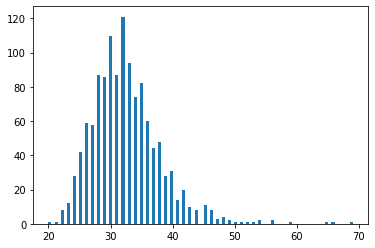

In [53]:
plt.hist(raw_data.Age, range=(min(raw_data.Age), max(raw_data.Age)),bins=100)
plt.show()

**From the histogram we could see that the age variable is little skewed i.e. positively skewed.
For more accurate we could get the skewness of the variable we could also see some outliers are also their**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f09b4ab1d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f09b4ab4950>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f09b4ab1690>],
 'medians': [<matplotlib.lines.Line2D at 0x7f09b4ab6750>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f09b4ab6d10>],
 'means': []}

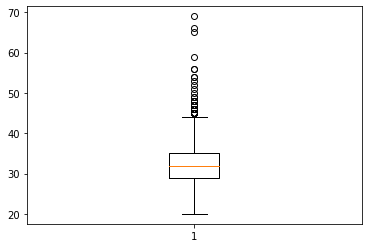

In [56]:
plt.boxplot(raw_data.Age)